## Cargamos el dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Carquemos el dataset 
df_train = pd.read_csv("../data/train.csv")
# Veamos el tamaño
display("Dimensiones: ", df_train.shape)
# Y sus primeras filas 
pd.set_option("display.max.columns", None)
df_train.head(5)

'Dimensiones: '

(240000, 23)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [2]:
# Importo las funciones necesarias desde otro archivo nuestro
from extra_scripts import cross_validate, rmse, rmsle

# Experimento 2:
## Estimar cant de baños en funcion de habitaciones y metros cubiertos

In [3]:
df_train = df_train[df_train['habitaciones'].notna()]
df_train = df_train[df_train['banos'].notna()]
df_train = df_train[df_train['metroscubiertos'].notna()]
df_train = df_train[df_train['antiguedad'].notna()]
df_train.shape

(171827, 23)

In [4]:
limite = df_train.shape[0]

# Randomizo los valores y me quedo con un 80% del dataset para training
cant_train = int((limite / 100) * 80)
shuffle = df_train.sample(random_state=np.random.seed(1), frac=1)
new_train = shuffle.iloc[:cant_train, :]
x_train = new_train[["metroscubiertos"]].values
y_train = new_train["banos"].values

print(f"train: {x_train.shape}")

train: (137461, 1)


In [5]:
results_0 = cross_validate(10, x_train, y_train, True, True)

RMSE = (0.8076134890411371, 0.005978859546432582)
RMSLE = (0.26632097719370157, 0.001441596771375816)
R2 = (0.18942404584977685, 0.016437412625546082)


In [6]:
limite = df_train.shape[0]

# Randomizo los valores y me quedo con un 80% del dataset para training
cant_train = int((limite / 100) * 80)
shuffle = df_train.sample(random_state=np.random.seed(1), frac=1)
new_train = shuffle.iloc[:cant_train, :]
x_train = new_train[["metroscubiertos", "habitaciones"]].values
y_train = new_train["banos"].values

print(f"train: {x_train.shape}")

train: (137461, 2)


In [7]:
results_1 = cross_validate(10, x_train, y_train, True, True)

RMSE = (0.6492682205417172, 0.003494940163630401)
RMSLE = (0.2046642725772871, 0.0010411125994698603)
R2 = (0.4761858069633814, 0.005115435308111951)


In [8]:
limite = df_train.shape[0]

# Randomizo los valores y me quedo con un 80% del dataset para training
cant_train = int((limite / 100) * 80)
shuffle = df_train.sample(random_state=np.random.seed(1), frac=1)
new_train = shuffle.iloc[:cant_train, :]
x_train = new_train[["metroscubiertos", "antiguedad"]].values
y_train = new_train["banos"].values

print(f"train: {x_train.shape}")

train: (137461, 2)


In [9]:
results_2 = cross_validate(10, x_train, y_train, True, True)

RMSE = (0.805585537981336, 0.005963935388011391)
RMSLE = (0.26385716954164395, 0.0014540477320775685)
R2 = (0.19349181371868132, 0.016250438172952908)


In [10]:
limite = df_train.shape[0]

# Randomizo los valores y me quedo con un 80% del dataset para training
cant_train = int((limite / 100) * 80)
shuffle = df_train.sample(random_state=np.random.seed(1), frac=1)
new_train = shuffle.iloc[:cant_train, :]
x_train = new_train[["metroscubiertos", "escuelascercanas"]].values
y_train = new_train["banos"].values

print(f"train: {x_train.shape}")

train: (137461, 2)


In [11]:
results_3 = cross_validate(10, x_train, y_train, True, True)

RMSE = (0.7738505241641701, 0.006223013955959826)
RMSLE = (0.25229461135694026, 0.0016919634804811532)
R2 = (0.2557858317441113, 0.015234591837684715)


Graficamos el error

In [12]:
# RMSLE
df_results_0 = pd.DataFrame(results_0["RMSLE"])
df_results_0.columns = ["value"]
df_results_0["feature_adicional"] = ["sin_adicional"]*df_results_0.shape[0]

df_results_1 = pd.DataFrame(results_1["RMSLE"])
df_results_1.columns = ["value"]
df_results_1["feature_adicional"] = ["habitaciones"]*df_results_1.shape[0]

df_results_2 = pd.DataFrame(results_2["RMSLE"])
df_results_2.columns = ["value"]
df_results_2["feature_adicional"] = ["antiguedad"]*df_results_2.shape[0]

df_results_3 = pd.DataFrame(results_3["RMSLE"])
df_results_3.columns = ["value"]
df_results_3["feature_adicional"] = ["escuelascercanas"]*df_results_3.shape[0]

df_results_rmsle = pd.concat([df_results_0, df_results_1, df_results_2, df_results_3])
df_results_rmsle["metrica"] = ["RMSLE"]*df_results_rmsle.shape[0]

# RMSE
df_results_0 = pd.DataFrame(results_0["RMSE"])
df_results_0.columns = ["value"]
df_results_0["feature_adicional"] = ["sin_adicional"]*df_results_0.shape[0]

df_results_1 = pd.DataFrame(results_1["RMSE"])
df_results_1.columns = ["value"]
df_results_1["feature_adicional"] = ["habitaciones"]*df_results_1.shape[0]

df_results_2 = pd.DataFrame(results_2["RMSE"])
df_results_2.columns = ["value"]
df_results_2["feature_adicional"] = ["antiguedad"]*df_results_2.shape[0]

df_results_3 = pd.DataFrame(results_3["RMSE"])
df_results_3.columns = ["value"]
df_results_3["feature_adicional"] = ["escuelascercanas"]*df_results_3.shape[0]

df_results_rmse = pd.concat([df_results_0, df_results_1, df_results_2, df_results_3])
df_results_rmse["metrica"] = ["RMSE"]*df_results_rmse.shape[0]

# R2
df_results_0 = pd.DataFrame(results_0["R2"])
df_results_0.columns = ["value"]
df_results_0["feature_adicional"] = ["sin_adicional"]*df_results_0.shape[0]

df_results_1 = pd.DataFrame(results_1["R2"])
df_results_1.columns = ["value"]
df_results_1["feature_adicional"] = ["habitaciones"]*df_results_1.shape[0]

df_results_2 = pd.DataFrame(results_2["R2"])
df_results_2.columns = ["value"]
df_results_2["feature_adicional"] = ["antiguedad"]*df_results_2.shape[0]

df_results_3 = pd.DataFrame(results_3["R2"])
df_results_3.columns = ["value"]
df_results_3["feature_adicional"] = ["escuelascercanas"]*df_results_3.shape[0]

df_results_r2 = pd.concat([df_results_0, df_results_1, df_results_2, df_results_3])
df_results_r2["metrica"] = ["R2"]*df_results_r2.shape[0]

# display(df_results_rmsle)
# display(df_results_rmse)
# display(df_results_r2)

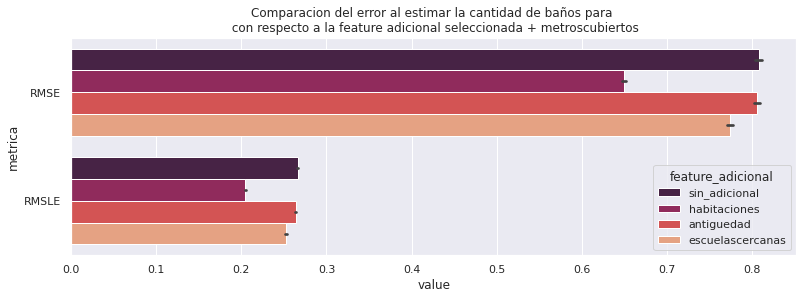

In [13]:
sns.set()
plt.figure(figsize=(13, 4))

sns.barplot(data=pd.concat([df_results_rmse, df_results_rmsle]), y='metrica', x="value", hue="feature_adicional", palette="rocket")
plt.title("Comparacion del error al estimar la cantidad de baños para \n con respecto a la feature adicional seleccionada + metroscubiertos")

plt.savefig("Exp1b/Comp-de-error-para-las-features-seleccionadas.png", bbox_inches = "tight")

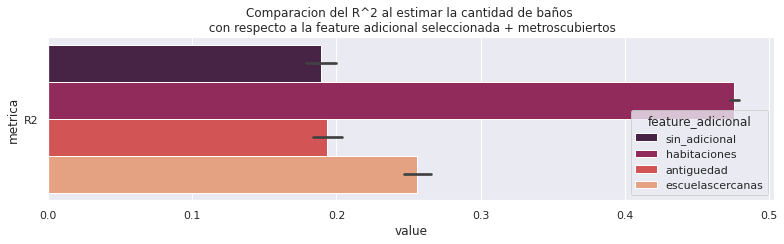

In [14]:
sns.set()
plt.figure(figsize=(13, 3))

sns.barplot(data=pd.concat([df_results_r2]), y='metrica', x="value", hue="feature_adicional", palette="rocket")
plt.title("Comparacion del R^2 al estimar la cantidad de baños \n con respecto a la feature adicional seleccionada + metroscubiertos")

plt.savefig("Exp1b/Comp-de-r2-para-las-features-seleccionadas.png", bbox_inches = "tight")


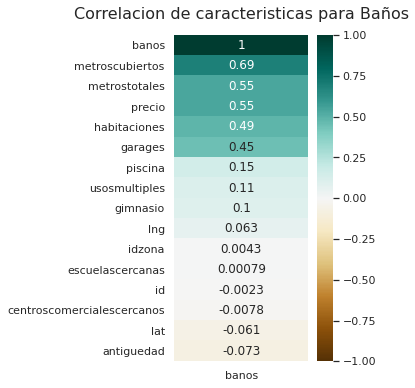

In [15]:
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(df_train.corr()[['banos']].sort_values(by='banos', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlacion de caracteristicas para Baños', fontdict={'fontsize':16}, pad=16)

plt.savefig("Exp1b/Correlacion-de-caracteristicas-para-Banos.png", bbox_inches = "tight")